# **Import the Libraries:**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# **Adding CNN Layers:**


In [11]:
model = Sequential()


In [12]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = "relu"))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
model.add(Convolution2D(32,(3,3),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten()) # ANN Input...

# **Adding Dense Layers:**

In [17]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [18]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [19]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))


In [20]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

In [21]:
model.add(Dense(units = 128,kernel_initializer = "random_uniform",activation = "relu"))

# **Adding Output Layer:**

In [22]:
model.add(Dense(units = 6,kernel_initializer = "random_uniform",activation = "softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **Train the model:**


In [25]:
model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=9, validation_data=x_test,validation_steps = len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/9
480/480 [==============================] - 41s 66ms/step - loss: 1.3631 - accuracy: 0.5007 - val_loss: 1.6149 - val_accuracy: 0.4544
Epoch 2/9
480/480 [==============================] - 31s 65ms/step - loss: 0.7976 - accuracy: 0.6908 - val_loss: 0.9267 - val_accuracy: 0.6988
Epoch 3/9
480/480 [==============================] - 34s 71ms/step - loss: 0.3399 - accuracy: 0.8819 - val_loss: 0.6958 - val_accuracy: 0.7965
Epoch 4/9
480/480 [==============================] - 30s 63ms/step - loss: 0.2286 - accuracy: 0.9223 - val_loss: 0.5724 - val_accuracy: 0.8095
Epoch 5/9
480/480 [==============================] - 30s 63ms/step - loss: 0.1798 - accuracy: 0.9439 - val_loss: 0.4829 - val_accuracy: 0.8488
Epoch 6/9
480/480 [==============================] - 30s 63ms/step - loss: 0.1416 - accuracy: 0.9555 - val_loss: 0.5124 - val_accuracy: 0.8549
Epoch 7/9
480/480 [==============================] - 30s 62ms/step - loss: 0.1068 - accuracy: 0.9662 - val_loss: 0.5708 - val_accuracy: 0.8585

# **Save the model:**

In [26]:
#Saving Model.
model.save('ECG.h5')

# **Testing the model:**

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('ECG.h5')

In [30]:
img=image.load_img("/content/fig_44.png",target_size=(64,64))

In [31]:
x=image.img_to_array(img) 

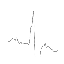

In [32]:
img

In [33]:
import numpy as np

In [34]:
x=np.expand_dims(x,axis=0)

In [35]:
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred

1/1 [==============================] - 0s 151ms/step


4

In [36]:
index=['left Bundle Branch block',
       'Normal',
       'Premature Atrial Contraction',
       'Premature Ventricular Contraction',
       'Right Bundle Branch Block',
       'Ventricular Fibrillation']


In [37]:

result = str(index[y_pred])
result

'Right Bundle Branch Block'